In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

In [94]:
#Penguins Dataset
df = pd.read_csv("noisy_datasets/penguins.csv")
print(df.head())

  species     island  calorie requirement  average sleep duration  \
0  Adelie  Torgersen                 6563                      11   
1  Adelie  Torgersen                 4890                      14   
2  Adelie  Torgersen                 7184                      11   
3  Adelie  Torgersen                 4169                       8   
4  Adelie  Torgersen                 4774                       8   

   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  gender  \
0            39.1           18.7              181.0       3750.0    male   
1            39.5           17.4              186.0       3800.0  female   
2            40.3           18.0              195.0       3250.0  female   
3             NaN            NaN                NaN        992.0     NaN   
4            36.7           19.3              193.0       3450.0  female   

     year  
0  2007.0  
1  2007.0  
2  2007.0  
3  2007.0  
4  2007.0  


In [95]:
print(df.describe())

       calorie requirement  average sleep duration  bill_length_mm  \
count           344.000000              344.000000      337.000000   
mean           5270.002907               10.447674       45.494214   
std            1067.959116                2.265895       10.815787   
min            3504.000000                7.000000       32.100000   
25%            4403.000000                9.000000       39.500000   
50%            5106.500000               10.000000       45.100000   
75%            6212.750000               12.000000       49.000000   
max            7197.000000               14.000000      124.300000   

       bill_depth_mm  flipper_length_mm  body_mass_g         year  
count     333.000000         336.000000   339.000000   342.000000  
mean       18.018318         197.764881  4175.463127  2008.035088  
std         9.241384          27.764491   858.713267     0.816938  
min        13.100000          10.000000   882.000000  2007.000000  
25%        15.700000         

In [96]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   species                 333 non-null    object 
 1   island                  334 non-null    object 
 2   calorie requirement     344 non-null    int64  
 3   average sleep duration  344 non-null    int64  
 4   bill_length_mm          337 non-null    float64
 5   bill_depth_mm           333 non-null    float64
 6   flipper_length_mm       336 non-null    float64
 7   body_mass_g             339 non-null    float64
 8   gender                  327 non-null    object 
 9   year                    342 non-null    float64
dtypes: float64(5), int64(2), object(3)
memory usage: 27.0+ KB
None


In [97]:
print(df.any())

species                   True
island                    True
calorie requirement       True
average sleep duration    True
bill_length_mm            True
bill_depth_mm             True
flipper_length_mm         True
body_mass_g               True
gender                    True
year                      True
dtype: bool


In [98]:
# def euclDistance(a,b):
#     return np.sqrt(np.sum((a-b)**2))

# def imputeKnn(df, featureIndex, k):
#     impDf = df.copy()
    
#     for i in range(len(df)):
#         if np.isnan(df[i,featureIndex]):
#             distances = []
#             for j in range(len(df)):
#                 if i!=j and not np.isnan(df[j, featureIndex]):
#                     distances.append(j, euclDistance(df[i,featureIndex],df[j, featureIndex]))
#             distances.sort(key=lambda d:d[1])
#             neighborList = [j for j,_ in distances[:k]]
#             neighborVals = [df[j,featureIndex] for j in neighborList]
#             impDf[i,featureIndex] = np.mean(neighborVals)
            
#     return impDf

# We worked on this, but could not find perfect usecase, so did not fully complete

In [99]:
numericCols = df.select_dtypes(include=[np.number]).columns
df[numericCols] = df[numericCols].fillna(df[numericCols].mean())

categoricCols = df.select_dtypes(exclude=[np.number]).columns.unique()
df[categoricCols]  = df[categoricCols].fillna(df[categoricCols].mode().iloc[0])

In [100]:
print(df)
dfn = df.isnull()
print(dfn.any())

       species     island  calorie requirement  average sleep duration  \
0       Adelie  Torgersen                 6563                      11   
1       Adelie  Torgersen                 4890                      14   
2       Adelie  Torgersen                 7184                      11   
3       Adelie  Torgersen                 4169                       8   
4       Adelie  Torgersen                 4774                       8   
..         ...        ...                  ...                     ...   
339  Chinstrap      Dream                 4826                      11   
340  Chinstrap      Dream                 4111                       9   
341  Chinstrap      Dream                 7049                      10   
342  Chinstrap      Dream                 4705                       7   
343  Chinstrap      Dream                 6098                       7   

     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  gender  \
0         39.100000      18.70000

In [101]:
df1= df.copy()
df1["species"] = df1["species"].str.lower()
df1["species"] = df1["species"].str.strip()

df1["island"] = df1["island"].str.lower()
df1["island"] = df1["island"].str.strip()

df1["gender"] = df1["gender"].str.lower()
df1["gender"] = df1["gender"].str.strip()

df = df1

In [102]:
def removeOutliers(df, column, threshold=3):
    zScore = np.abs((df[column]- df[column].mean())/df[column].std())
    df = df[zScore<= threshold]
    return df

In [103]:
print(df)

       species     island  calorie requirement  average sleep duration  \
0       adelie  torgersen                 6563                      11   
1       adelie  torgersen                 4890                      14   
2       adelie  torgersen                 7184                      11   
3       adelie  torgersen                 4169                       8   
4       adelie  torgersen                 4774                       8   
..         ...        ...                  ...                     ...   
339  chinstrap      dream                 4826                      11   
340  chinstrap      dream                 4111                       9   
341  chinstrap      dream                 7049                      10   
342  chinstrap      dream                 4705                       7   
343  chinstrap      dream                 6098                       7   

     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  gender  \
0         39.100000      18.70000

In [104]:
for c, dtype in df.dtypes.items():
    if dtype=="int64" or dtype=="float64":
        df = removeOutliers(df, c, threshold = 3)
print(df)

       species     island  calorie requirement  average sleep duration  \
0       adelie  torgersen                 6563                      11   
1       adelie  torgersen                 4890                      14   
2       adelie  torgersen                 7184                      11   
4       adelie  torgersen                 4774                       8   
5       adelie  torgersen                 4403                      13   
..         ...        ...                  ...                     ...   
339  chinstrap      dream                 4826                      11   
340  chinstrap      dream                 4111                       9   
341  chinstrap      dream                 7049                      10   
342  chinstrap      dream                 4705                       7   
343  chinstrap      dream                 6098                       7   

     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  gender  \
0              39.1           18.

In [105]:
def removeOutliers(df, column, threshold=3):
    zScore = np.abs((df[column]- df[column].mean())/df[column].std())
    df = df[zScore<= threshold]
    return df

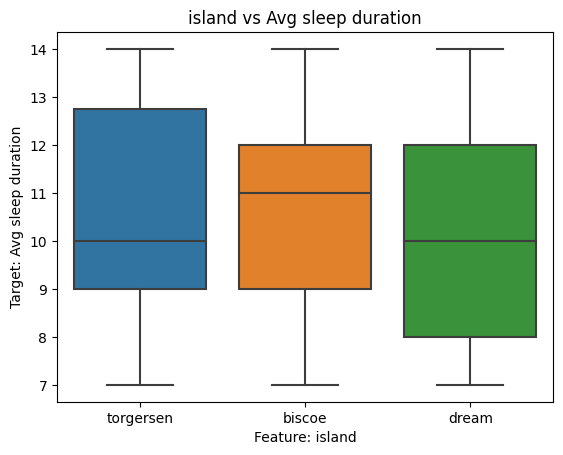

In [106]:
import seaborn as sns
sns.boxplot(x='island', y='average sleep duration', data = df)

plt.xlabel('Feature: island')
plt.ylabel('Target: Avg sleep duration')
plt.title('island vs Avg sleep duration')
plt.show()

[146, 62, 117]
['adelie', 'gentoo', 'chinstrap']


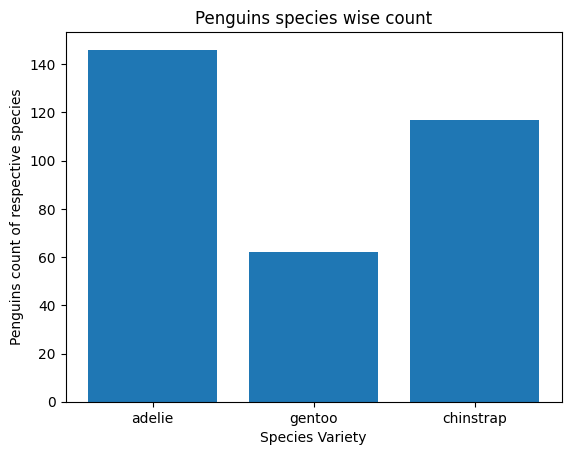

In [107]:
spcsVar = df.groupby('species').count()
spcsWiseCount = [c for c in spcsVar['island']]
print(spcsWiseCount)
spcs = [spcs for spcs in df['species'].unique()]
print(spcs)


plt.bar(spcs, spcsWiseCount)
plt.title("Penguins species wise count")
plt.xlabel('Species Variety')
plt.ylabel('Penguins count of respective species')
plt.show()

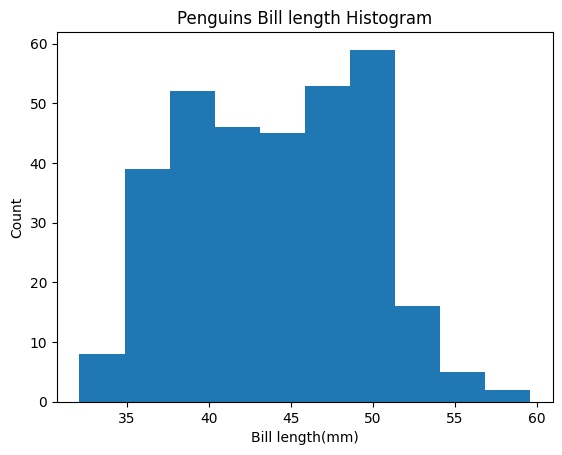

In [108]:
plt.hist(df['bill_length_mm'].to_list())
plt.title("Penguins Bill length Histogram")
plt.xlabel('Bill length(mm)')
plt.ylabel('Count')
plt.show()

body_mass_g
(3200-3500]    44
(3500-3800]    58
(3800-4100]    39
(4100-4400]    39
(4400-4500]     7
Name: species, dtype: int64


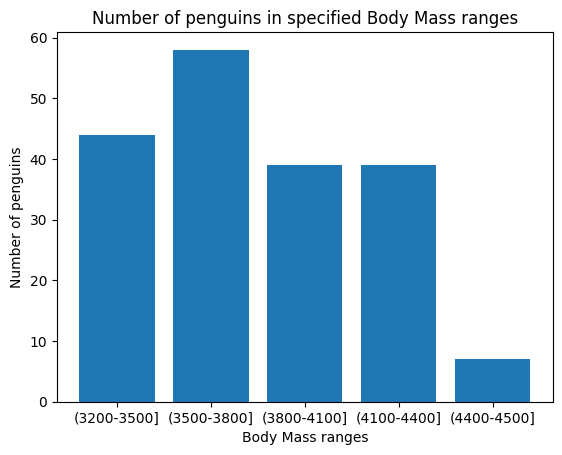

In [109]:
filtered_df = df[(df['body_mass_g'] >=3200) & (df['body_mass_g']<=4500)]

bm_ranges = pd.cut(filtered_df['body_mass_g'], bins=[3200, 3500, 3800, 4100, 4400, 4500], labels = ['(3200-3500]', '(3500-3800]', '(3800-4100]', '(4100-4400]','(4400-4500]'])

grpd_df = filtered_df.groupby(bm_ranges)['species'].count()
print(grpd_df)



plt.bar(grpd_df.index, grpd_df.values)
plt.title('Number of penguins in specified Body Mass ranges')
plt.xlabel('Body Mass ranges')
plt.ylabel('Number of penguins')
plt.show()

In [110]:
df = pd.get_dummies(df, columns =['island'], prefix=['island'])
df = pd.get_dummies(df, columns = ['species'], prefix=['species'])
df["gender"] = df["gender"].replace({"male":0, "female":1})

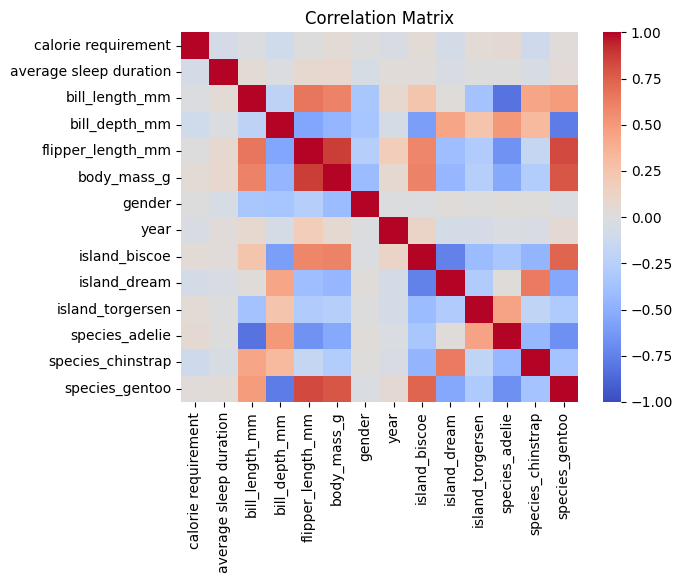

In [111]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, cmap = 'coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

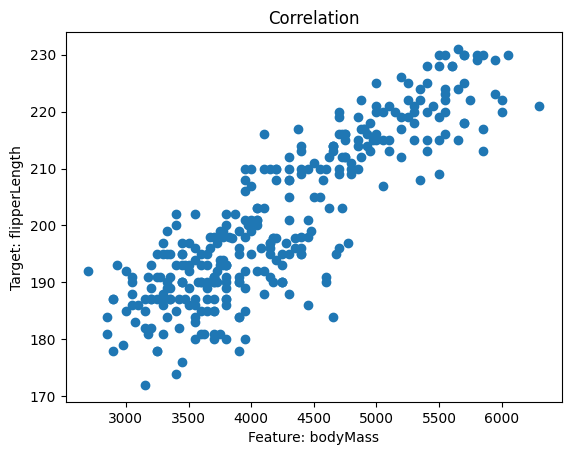

In [112]:
x = df['body_mass_g']
y = df['flipper_length_mm']

plt.scatter(x,y)

plt.xlabel('Feature: bodyMass')
plt.ylabel('Target: flipperLength')
plt.title('Correlation')
plt.show()

In [113]:
target = 'flipper_length_mm'
corrMatrix = df.corr()

corrTarget = corrMatrix[target].abs()
corrThreshold = 0.1

lessCorrelated = corrTarget[corrTarget<corrThreshold].index.tolist()
df.drop(columns=lessCorrelated, inplace=True)

print(lessCorrelated)

['calorie requirement', 'average sleep duration']


In [114]:
df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,year,island_biscoe,island_dream,island_torgersen,species_adelie,species_chinstrap,species_gentoo
0,39.1,18.7,181.0,3750.0,0,2007.0,False,False,True,True,False,False
1,39.5,17.4,186.0,3800.0,1,2007.0,False,False,True,True,False,False
2,40.3,18.0,195.0,3250.0,1,2007.0,False,False,True,True,False,False
4,36.7,19.3,193.0,3450.0,1,2007.0,False,False,True,True,False,False
5,39.3,20.6,190.0,3650.0,0,2007.0,False,False,True,True,False,False


In [115]:
colNormalize = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
minValues = df[colNormalize].min()
maxValues = df[colNormalize].max()

for c in colNormalize:
    df[c] = (df[c]- minValues[c])/(maxValues[c]-minValues[c])
print(df.head())

   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  gender  \
0        0.254545       0.666667           0.152542     0.291667       0   
1        0.269091       0.511905           0.237288     0.305556       1   
2        0.298182       0.583333           0.389831     0.152778       1   
4        0.167273       0.738095           0.355932     0.208333       1   
5        0.261818       0.892857           0.305085     0.263889       0   

     year  island_biscoe  island_dream  island_torgersen  species_adelie  \
0  2007.0          False         False              True            True   
1  2007.0          False         False              True            True   
2  2007.0          False         False              True            True   
4  2007.0          False         False              True            True   
5  2007.0          False         False              True            True   

   species_chinstrap  species_gentoo  
0              False           False  
1       

In [116]:
print(df)

     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  gender  \
0          0.254545       0.666667           0.152542     0.291667       0   
1          0.269091       0.511905           0.237288     0.305556       1   
2          0.298182       0.583333           0.389831     0.152778       1   
4          0.167273       0.738095           0.355932     0.208333       1   
5          0.261818       0.892857           0.305085     0.263889       0   
..              ...            ...                ...          ...     ...   
339        0.861818       0.797619           0.593220     0.361111       0   
340        0.414545       0.595238           0.508475     0.194444       1   
341        0.636364       0.607143           0.355932     0.298611       0   
342        0.680000       0.702381           0.644068     0.388889       0   
343        0.658182       0.666667           0.440678     0.298611       1   

       year  island_biscoe  island_dream  island_torgersen  spe

In [245]:
df.to_csv("penguins_preprocessed.csv", index=False)

In [117]:
class LogitRegression():
    def __init__(self, learn_rate, num_iteration):
        self.learn_rate = learn_rate
        self.num_iteration = num_iteration
        self.weights = None
        self.b = None
        self.loss = None

    def sigmoid(self, Z):
        return 1 / (1 + np.exp(-Z))
    
    def cost(self, weights, x, y, b):
        Z = np.dot(x, weights) + b
        h = self.sigmoid(Z)
        y = y.to_numpy().reshape(-1, 1)
        return ((-y * np.log(h) - (1 - y) * np.log(1-h)).sum())/len(y)
    
    def gradient_descent(self, weights, X, y_train, b):
        Z = np.dot(X, weights) +  b
        y_hat = self.sigmoid(Z)
        y_train = y_train.to_numpy().reshape(-1, 1)
        delta = y_hat - y_train
        N = len(y_train)
        return (np.dot(np.transpose(X),(delta)))/N

    def fit(self, X_train, y_train):
        loss = []
        self.b = 0
        self.weights = np.array([np.random.uniform(0, 1) for _ in range(X_train.shape[1])])
        self.weights = self.weights[:, np.newaxis]
        for _ in range(self.num_iteration):
            dW = self.gradient_descent(self.weights, X_train, y_train, self.b)
            self.weights -= self.learn_rate * dW
            loss.append(self.cost(self.weights, X_train, y_train, self.b))
        self.loss = loss
        
    
    def predict(self, X):
        result = []
        Z = np.dot(X, self.weights) + self.b
        h = self.sigmoid(Z) 
        for i in h:
            if i >= 0.5:
                result.append(1)
            else:
                result.append(0)
        return result

In [118]:
def accuracy(y_test, Y_predict):
    correct_pred = 0
    for test_val, pred_val in zip(y_test, Y_predict):
        if(test_val == pred_val):
            correct_pred +=1
    
    return correct_pred/len(y_test)

In [119]:
#Choosing Gender as Y here, and creating data matrices  
X_data = df.drop('gender', axis=1)
X_data = X_data.drop('year', axis=1)
Y_target = df['gender'] 

X_data = X_data.astype(float)
Y_target = Y_target.astype(float)

NumofSamplesTest = int(0.2 * len(df))

indexList = np.arange(len(df))
np.random.shuffle(indexList)

test_index = indexList[:NumofSamplesTest]
train_index = indexList[NumofSamplesTest:]

X_train = X_data.iloc[train_index]
y_train = Y_target.iloc[train_index]
X_test = X_data.iloc[test_index]
y_test = Y_target.iloc[test_index]

transformed_matrix = np.c_[np.ones(X_train.shape[0]), X_train]

print(X_train)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
193        0.636364       0.345238           0.898305     0.833333   
312        0.563636       0.619048           0.436693     0.319444   
190        0.432727       0.059524           0.436693     0.458333   
105        0.276364       0.690476           0.203390     0.236111   
324        0.705455       0.666667           0.254237     0.152778   
..              ...            ...                ...          ...   
334        0.658182       0.678571           0.508475     0.305556   
157        0.523636       0.047619           0.644068     0.513889   
183        0.389091       0.130952           0.627119     0.555556   
248        0.629091       0.321429           0.745763     0.618056   
202        0.527273       0.130952           0.644068     0.597222   

     island_biscoe  island_dream  island_torgersen  species_adelie  \
193            1.0           0.0               0.0             1.0   
312            0.0 

In [120]:
learn_rate_arr = [1e-2, 1e-3, 1e-4]
num_iter_arr = [90000, 100000, 110000]

result_arr = {}

for i in range(3):
    #Creating object for Logstic regression and fitting
    model = LogitRegression(learn_rate_arr[i], num_iter_arr[i])
    loss = model.fit(X_train, y_train)

    #predicting Gender based on X_test
    Y_predict = model.predict(X_test)

    acc = accuracy(y_test, Y_predict)
    result_arr.update({acc: model})

In [121]:
import pickle

pickle.dump(model.weights, open("best_weights.pkl", "wb"))

In [122]:
sorted_keys = sorted(result_arr.keys(), reverse=True)
final_arr = {}
for key in sorted_keys:
    final_arr[key] = result_arr[key]

Best Accuracy: 0.8461538461538461
Iterations:  90000


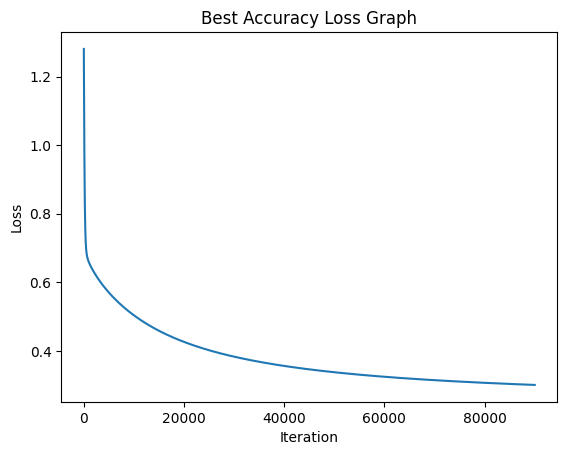

Accuracy 0.8153846153846154
Iterations:  100000


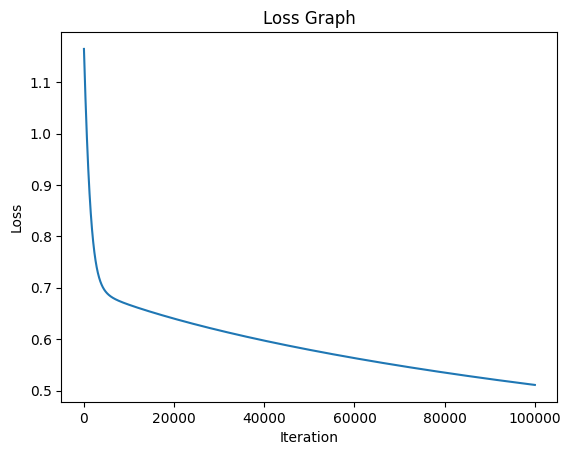

Accuracy 0.6153846153846154
Iterations:  110000


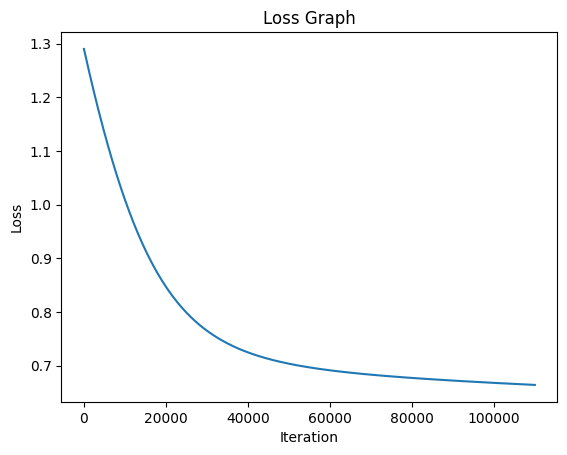

In [123]:
title = "Best Accuracy Loss Graph"
accuracystr = "Best Accuracy:"
for key in final_arr:
    model = final_arr[key]
    print(accuracystr, key)
    print("Iterations: ", model.num_iteration)
    loss_values = np.ravel(model.loss)
    plt.plot(range(model.num_iteration), model.loss)
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.title(title)
    plt.show()
    title = "Loss Graph"
    accuracystr = "Accuracy"

In [4]:
#Other dataset. i.e, Emissions dataset
df2 = pd.read_csv("noisy_datasets/emissions_by_country.csv")
print(df2)

           Country ISO 3166-1 alpha-3    Year         Total  Temperature  \
0      Afghanistan                AFG  1750.0      0.000000           70   
1      Afghanistan                AFG  1751.0      0.000000           66   
2      Afghanistan                AFG  1752.0      0.000000           72   
3      Afghanistan                AFG  1753.0      0.000000           44   
4      Afghanistan                AFG  1754.0      0.000000           21   
...            ...                ...     ...           ...          ...   
63099       Global                WLD  2017.0  36096.739276           22   
63100       Global                WLD  2018.0  36826.506600           44   
63101       Global                WLD  2019.0  37082.558969           78   
63102       Global                WLD  2020.0  35264.085734           34   
63103       Global                WLD  2021.0  37123.850352           36   

       GDP Per Capita (USD)          Coal           Oil          Gas  \
0              

In [5]:
df2.head()

,Country,ISO 3166-1 alpha-3,Year,Total,Temperature,GDP Per Capita (USD),Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750.0,0.0,70,55455,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751.0,0.0,66,45101,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752.0,0.0,72,31891,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753.0,0.0,44,35466,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754.0,0.0,21,33247,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df2.describe()

,Year,Total,Temperature,GDP Per Capita (USD),Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
count,62307.000000,62381.000000,63104.000000,63104.000000,21797.000000,21774.000000,21717.000000,20488.000000,21338.000000,2685.000000,19392.000000
mean,1888.267097,73.683456,49.497813,39026.539015,127.387271,153.480038,125.162671,62.599364,56.074327,849.395127,121.565443
std,122.651184,843.930381,17.292092,10975.539432,677.951392,670.830891,514.391435,353.918064,337.629062,1055.250022,489.339877
min,1003.000000,0.000000,20.000000,20000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1816.000000,0.000000,35.000000,29498.750000,0.000000,0.113584,0.000000,0.000000,0.000000,1.016000,0.231702
50%,1886.000000,0.000000,49.000000,39067.000000,0.344416,1.344688,0.000000,0.032709,0.000000,9.237945,1.601436
75%,1955.000000,0.659520,64.000000,48544.250000,8.500480,13.008908,1.683510,0.725079,0.000000,1812.000000,6.305100
max,2999.000000,37123.850352,79.000000,57999.000000,15051.512770,12345.653374,7921.829472,2982.000000,2994.000000,2999.000000,2997.000000


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63104 entries, 0 to 63103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               61087 non-null  object 
 1   ISO 3166-1 alpha-3    59483 non-null  object 
 2   Year                  62307 non-null  float64
 3   Total                 62381 non-null  float64
 4   Temperature           63104 non-null  int64  
 5   GDP Per Capita (USD)  63104 non-null  int64  
 6   Coal                  21797 non-null  float64
 7   Oil                   21774 non-null  float64
 8   Gas                   21717 non-null  float64
 9   Cement                20488 non-null  float64
 10  Flaring               21338 non-null  float64
 11  Other                 2685 non-null   float64
 12  Per Capita            19392 non-null  float64
dtypes: float64(9), int64(2), object(2)
memory usage: 6.3+ MB


In [8]:
df2.any()

Country                 True
ISO 3166-1 alpha-3      True
Year                    True
Total                   True
Temperature             True
GDP Per Capita (USD)    True
Coal                    True
Oil                     True
Gas                     True
Cement                  True
Flaring                 True
Other                   True
Per Capita              True
dtype: bool

In [9]:
print(df2)
dfn = df2.isnull()
print(dfn.any())

           Country ISO 3166-1 alpha-3    Year         Total  Temperature  \
0      Afghanistan                AFG  1750.0      0.000000           70   
1      Afghanistan                AFG  1751.0      0.000000           66   
2      Afghanistan                AFG  1752.0      0.000000           72   
3      Afghanistan                AFG  1753.0      0.000000           44   
4      Afghanistan                AFG  1754.0      0.000000           21   
...            ...                ...     ...           ...          ...   
63099       Global                WLD  2017.0  36096.739276           22   
63100       Global                WLD  2018.0  36826.506600           44   
63101       Global                WLD  2019.0  37082.558969           78   
63102       Global                WLD  2020.0  35264.085734           34   
63103       Global                WLD  2021.0  37123.850352           36   

       GDP Per Capita (USD)          Coal           Oil          Gas  \
0              

In [10]:
df2.isnull().sum()

Country                  2017
ISO 3166-1 alpha-3       3621
Year                      797
Total                     723
Temperature                 0
GDP Per Capita (USD)        0
Coal                    41307
Oil                     41330
Gas                     41387
Cement                  42616
Flaring                 41766
Other                   60419
Per Capita              43712
dtype: int64

In [11]:
df1= df2.copy()
df1["Country"] = df1["Country"].str.lower()
df1["Country"] = df1["Country"].str.strip()

df1["ISO 3166-1 alpha-3"] = df1["ISO 3166-1 alpha-3"].str.lower()
df1["ISO 3166-1 alpha-3"] = df1["ISO 3166-1 alpha-3"].str.strip()


df2 = df1

In [12]:
df2.head()

,Country,ISO 3166-1 alpha-3,Year,Total,Temperature,GDP Per Capita (USD),Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,afghanistan,afg,1750.0,0.0,70,55455,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,afghanistan,afg,1751.0,0.0,66,45101,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,afghanistan,afg,1752.0,0.0,72,31891,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,afghanistan,afg,1753.0,0.0,44,35466,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,afghanistan,afg,1754.0,0.0,21,33247,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df2.shape
df2.isnull().sum()

Country                  2017
ISO 3166-1 alpha-3       3621
Year                      797
Total                     723
Temperature                 0
GDP Per Capita (USD)        0
Coal                    41307
Oil                     41330
Gas                     41387
Cement                  42616
Flaring                 41766
Other                   60419
Per Capita              43712
dtype: int64

In [14]:
df2 = df2.dropna(subset=['Country', 'ISO 3166-1 alpha-3', 'Year', 'Total'])
df2.shape

(57525, 13)

In [15]:
c=['Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Other', 'Per Capita']

rows_with_all_null = df2[df2[c].isnull().all(axis=1)]

# Get the number of rows with all null values
num_rows_with_all_null = len(rows_with_all_null)

print(num_rows_with_all_null) 

32085


In [16]:
df2 = df2.dropna(subset=c, how='all')

In [17]:
print(df2)

           Country ISO 3166-1 alpha-3    Year         Total  Temperature  \
95     afghanistan                afg  2905.0      0.000000           34   
153    afghanistan                afg  1903.0      0.000000           40   
157    afghanistan                afg  1907.0      0.000000           67   
158    afghanistan                afg  1908.0      0.000000           27   
199    afghanistan                afg  1949.0      0.014656           24   
...            ...                ...     ...           ...          ...   
63099       global                wld  2017.0  36096.739276           22   
63100       global                wld  2018.0  36826.506600           44   
63101       global                wld  2019.0  37082.558969           78   
63102       global                wld  2020.0  35264.085734           34   
63103       global                wld  2021.0  37123.850352           36   

       GDP Per Capita (USD)          Coal           Oil          Gas  \
95             

In [18]:

nullCol = ['Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Other', 'Per Capita']
df2[nullCol] = df2[nullCol].fillna(0)
df2.shape

(25440, 13)

In [19]:
def removeOutliers(df, column, threshold=50):
    zScore = np.abs((df[column]- df[column].mean())/df[column].std())
    df = df[zScore<= threshold]
    return df

In [20]:
print(df2)
for c, dtype in df2.dtypes.items():
    if dtype=="int64" or dtype=="float64":
        df2 = removeOutliers(df2, c, threshold = 5)
print(df2)
    

           Country ISO 3166-1 alpha-3    Year         Total  Temperature  \
95     afghanistan                afg  2905.0      0.000000           34   
153    afghanistan                afg  1903.0      0.000000           40   
157    afghanistan                afg  1907.0      0.000000           67   
158    afghanistan                afg  1908.0      0.000000           27   
199    afghanistan                afg  1949.0      0.014656           24   
...            ...                ...     ...           ...          ...   
63099       global                wld  2017.0  36096.739276           22   
63100       global                wld  2018.0  36826.506600           44   
63101       global                wld  2019.0  37082.558969           78   
63102       global                wld  2020.0  35264.085734           34   
63103       global                wld  2021.0  37123.850352           36   

       GDP Per Capita (USD)          Coal           Oil          Gas  \
95             

In [21]:
df2.isnull().sum()

Country                 0
ISO 3166-1 alpha-3      0
Year                    0
Total                   0
Temperature             0
GDP Per Capita (USD)    0
Coal                    0
Oil                     0
Gas                     0
Cement                  0
Flaring                 0
Other                   0
Per Capita              0
dtype: int64

In [22]:
df2.isnull().sum()

Country                 0
ISO 3166-1 alpha-3      0
Year                    0
Total                   0
Temperature             0
GDP Per Capita (USD)    0
Coal                    0
Oil                     0
Gas                     0
Cement                  0
Flaring                 0
Other                   0
Per Capita              0
dtype: int64

In [23]:
df2= df2.dropna(subset=['ISO 3166-1 alpha-3'])
df2.isnull().sum()

Country                 0
ISO 3166-1 alpha-3      0
Year                    0
Total                   0
Temperature             0
GDP Per Capita (USD)    0
Coal                    0
Oil                     0
Gas                     0
Cement                  0
Flaring                 0
Other                   0
Per Capita              0
dtype: int64

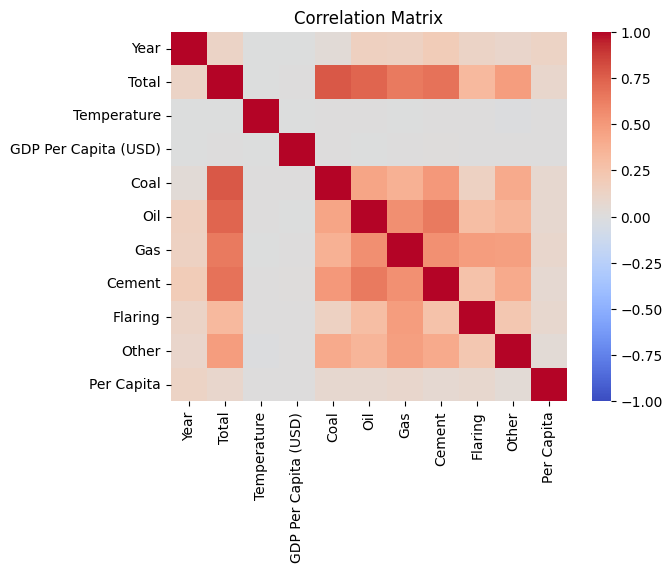

In [25]:
import seaborn as sns
numerical_col = df2.select_dtypes(include = [np.number]).columns
corrMatrix = df2[numerical_col].corr()
sns.heatmap(corrMatrix, cmap = 'coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

<Axes: >

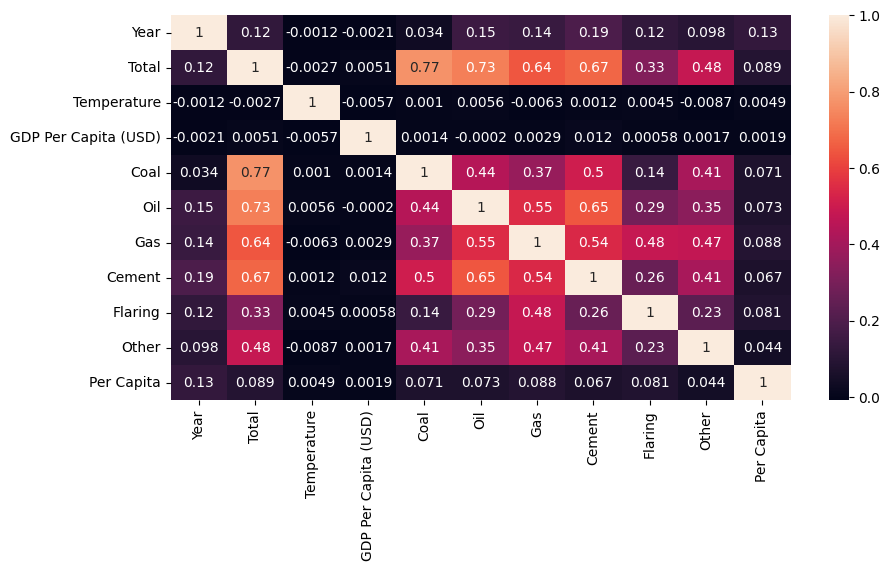

In [26]:
plt.figure(figsize=[10,5])
sns.heatmap(df2[numerical_col].corr(),annot=True)

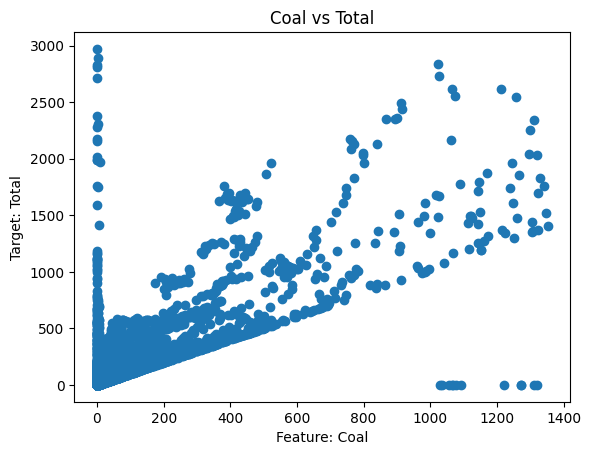

In [27]:
x = df2['Coal']
y = df2['Total']

plt.scatter(x,y)

plt.xlabel('Feature: Coal')
plt.ylabel('Target: Total')
plt.title('Coal vs Total')
plt.show()

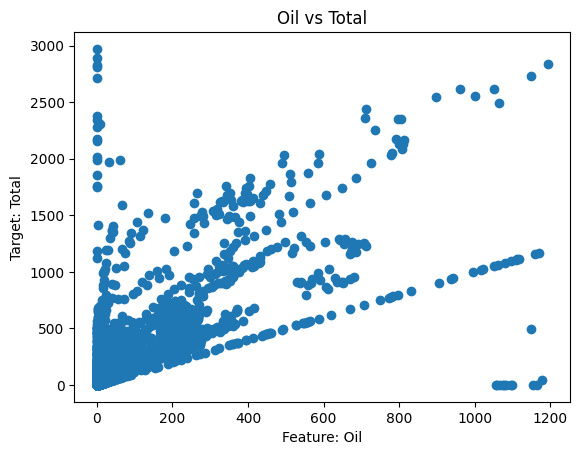

In [28]:
x = df2['Oil']
y = df2['Total']

plt.scatter(x,y)

plt.xlabel('Feature: Oil')
plt.ylabel('Target: Total')
plt.title('Oil vs Total')
plt.show()

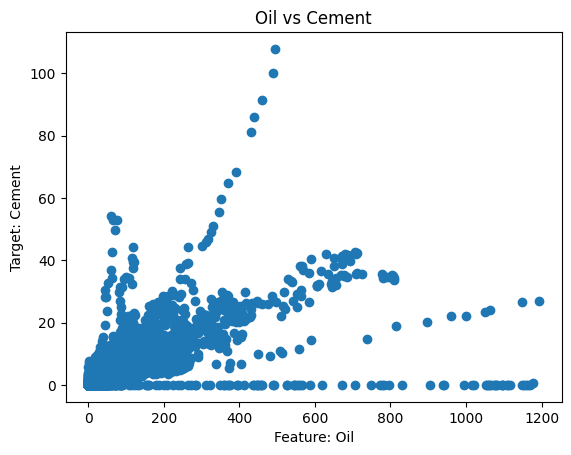

In [29]:
x = df2['Oil']
y = df2['Cement']

plt.scatter(x,y)

plt.xlabel('Feature: Oil')
plt.ylabel('Target: Cement')
plt.title('Oil vs Cement')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


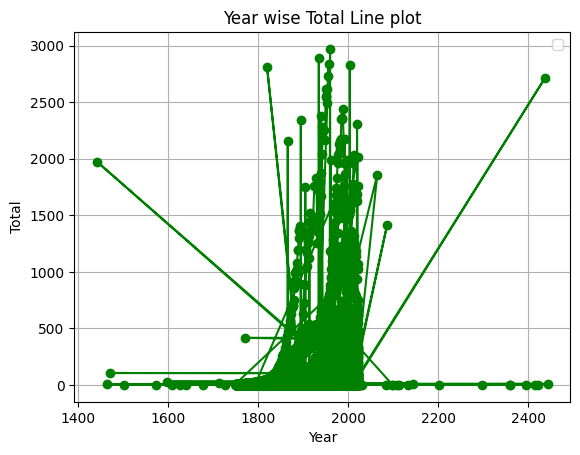

In [30]:
x = df2['Year']
y = df2['Total']

plt.plot(x, y, marker='o', color='g')
plt.xlabel('Year')
plt.ylabel('Total')
plt.title('Year wise Total Line plot')
plt.grid(True)
plt.legend()

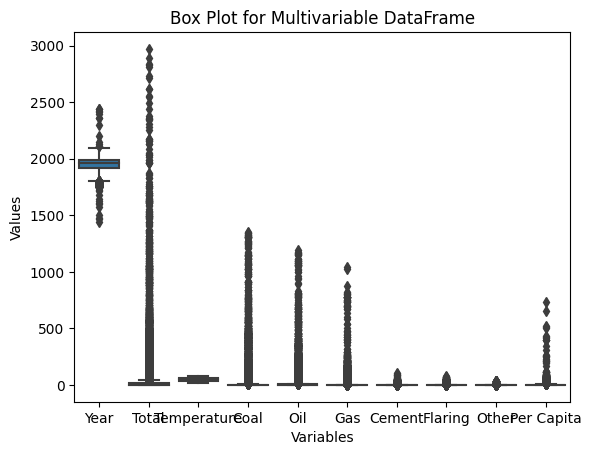

In [31]:
dfbox = df2.drop(columns=['GDP Per Capita (USD)'])
sns.boxplot(data=dfbox, orient='v')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.title('Box Plot for Multivariable DataFrame')
plt.show()

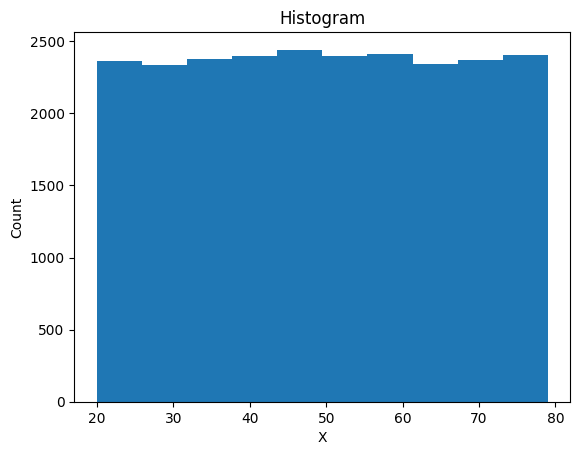

In [32]:
plt.hist(df2['Temperature'].to_list())
plt.title("Histogram")
plt.xlabel('X')
plt.ylabel('Count')
plt.show()

In [33]:
# df2 = pd.get_dummies(df2, columns =['Country'], prefix=['Country'])
# df2 = pd.get_dummies(df2, columns =['ISO 3166-1 alpha-3'], prefix=['ISO 3166-1 alpha-3'])
# print(df2.head())

In [34]:
df2.shape
df2.columns


# df2 = df2.drop(columns = ['Country', 'ISO 3166-1 alpha-3', 'Year'], axis=1)

Index(['Country', 'ISO 3166-1 alpha-3', 'Year', 'Total', 'Temperature',
       'GDP Per Capita (USD)', 'Coal', 'Oil', 'Gas', 'Cement', 'Flaring',
       'Other', 'Per Capita'],
      dtype='object')

In [35]:
df2.columns

Index(['Country', 'ISO 3166-1 alpha-3', 'Year', 'Total', 'Temperature',
       'GDP Per Capita (USD)', 'Coal', 'Oil', 'Gas', 'Cement', 'Flaring',
       'Other', 'Per Capita'],
      dtype='object')

In [36]:
df2.shape


(23835, 13)

In [37]:
df2 = df2.drop(columns = ['Country', 'ISO 3166-1 alpha-3', 'Year', 'GDP Per Capita (USD)', 'Temperature', 'Per Capita','Other'])

In [38]:
print(df2)

             Total         Coal        Oil        Gas    Cement  Flaring
199       0.014656     0.014656   0.000000   0.000000  0.000000      0.0
200       0.084272     0.021068   0.063204   0.000000  0.000000      0.0
201       0.091600     0.025648   0.065952   0.000000  0.000000      0.0
202       0.091600     0.031708   0.059892   0.000000  0.000000      0.0
203       0.106256     0.037949   0.068307   0.000000  0.000000      0.0
...            ...          ...        ...        ...       ...      ...
62972  1298.458211  1252.118418  34.651074  11.688053  0.000665      0.0
62973  1358.873924  1309.094179  40.831574   8.947488  0.000684      0.0
62974  1370.088253  1322.105893  40.206624   7.775008  0.000728      0.0
62975  1353.668692  1303.833400  42.546931   7.287696  0.000665      0.0
62976  1400.857613  1352.457466  41.701603   6.697850  0.000695      0.0

[23835 rows x 6 columns]


In [39]:
label_df = df2['Total']
features_df =df2.drop(['Total'], axis=1)

In [40]:
label_df.head()

199    0.014656
200    0.084272
201    0.091600
202    0.091600
203    0.106256
Name: Total, dtype: float64

In [41]:
features_df.head()

,Coal,Oil,Gas,Cement,Flaring
199,0.014656,0.000000,0.0,0.0,0.0
200,0.021068,0.063204,0.0,0.0,0.0
201,0.025648,0.065952,0.0,0.0,0.0
202,0.031708,0.059892,0.0,0.0,0.0
203,0.037949,0.068307,0.0,0.0,0.0


In [42]:
NumofSamplesTest = int(0.2 * len(df2))

indexList = np.arange(len(df2))
np.random.shuffle(indexList)

test_index = indexList[:NumofSamplesTest]
train_index = indexList[NumofSamplesTest:]

X_train = features_df.iloc[train_index]
y_train = label_df.iloc[train_index]
X_test = features_df.iloc[test_index]
y_test = label_df.iloc[test_index]

In [43]:
X_train.shape

(19068, 5)

In [44]:
X_test.shape

(4767, 5)

In [45]:
y_train.shape

(19068,)

In [46]:
y_test.shape

(4767,)

In [47]:
numericCols = X_train.select_dtypes(include = [np.number]).columns
minValues = X_train[numericCols].min()
maxValues = X_train[numericCols].max()

for c in numericCols:
    X_train[c] = (X_train[c]- minValues[c])/(maxValues[c]-minValues[c])
print(X_train.head())

           Coal       Oil       Gas    Cement   Flaring
42135  0.006339  0.041350  0.031310  0.033752  0.000000
22014  0.034821  0.041706  0.005097  0.059023  0.000091
45640  0.000000  0.000000  0.000000  0.008629  0.000000
61434  0.008631  0.004356  0.000114  0.004686  0.000000
13546  0.000000  0.007933  0.000000  0.000000  0.000000


/tmp/ipykernel_46489/1361396603.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[c] = (X_train[c]- minValues[c])/(maxValues[c]-minValues[c])


In [48]:
numericCols = X_test.select_dtypes(include = [np.number]).columns
minValues = X_test[numericCols].min()
maxValues = X_test[numericCols].max()

for c in numericCols:
    X_test[c] = (X_test[c]- minValues[c])/(maxValues[c]-minValues[c])
print(X_test.head())

           Coal       Oil       Gas    Cement  Flaring
24853  0.000208  0.000000  0.000000  0.000000      0.0
55742  0.000122  0.000920  0.001177  0.001036      0.0
22573  0.000000  0.000282  0.000000  0.000000      0.0
50759  0.000000  0.000000  0.000000  0.000000      0.0
48095  0.000000  0.000000  0.000000  0.000000      0.0


/tmp/ipykernel_46489/3126129596.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[c] = (X_test[c]- minValues[c])/(maxValues[c]-minValues[c])


In [49]:
X = pd.concat([X_train, X_test], axis=0)
Y = pd.concat([y_train, y_test], axis=0)
emissions_preprocessed = pd.concat([X, Y], axis=1)

emissions_preprocessed.to_csv("emissions_by_country_preprocessed.csv", index=False)

In [50]:
import numpy as np


def lin_model(X, Y):
    W = np.zeros((X.shape[1],1))
    Xt= np.transpose(X)
    a= np.dot(Xt,Y)
    b= np.dot(Xt,X)
    W = np.linalg.solve(b, a)
    
    Y_pred = np.dot(X,W)
    mse = (1/(2*(Y.size)))*np.sum(np.square(Y_pred-Y))
                
    return W, Y_pred, mse

In [51]:
W, Y_pred, mse = lin_model(X_train, y_train)

In [52]:
print(W)

[1241.7595018   973.67440697 1102.03952271  426.83349714  101.43779504]


In [53]:
print(Y_pred)

[ 97.04405089 114.6667061    3.6831446  ...   0.59475908  57.57865537
   4.09747799]


In [54]:
print(mse)

2687.7904853633313


In [55]:
print(y_train)

42135     93.788159
22014    109.485277
45640     29.982233
61434     17.495162
13546      9.468807
            ...    
26304      7.015757
28782      0.025648
18991      0.729136
44252     59.936086
5249       4.462752
Name: Total, Length: 19068, dtype: float64


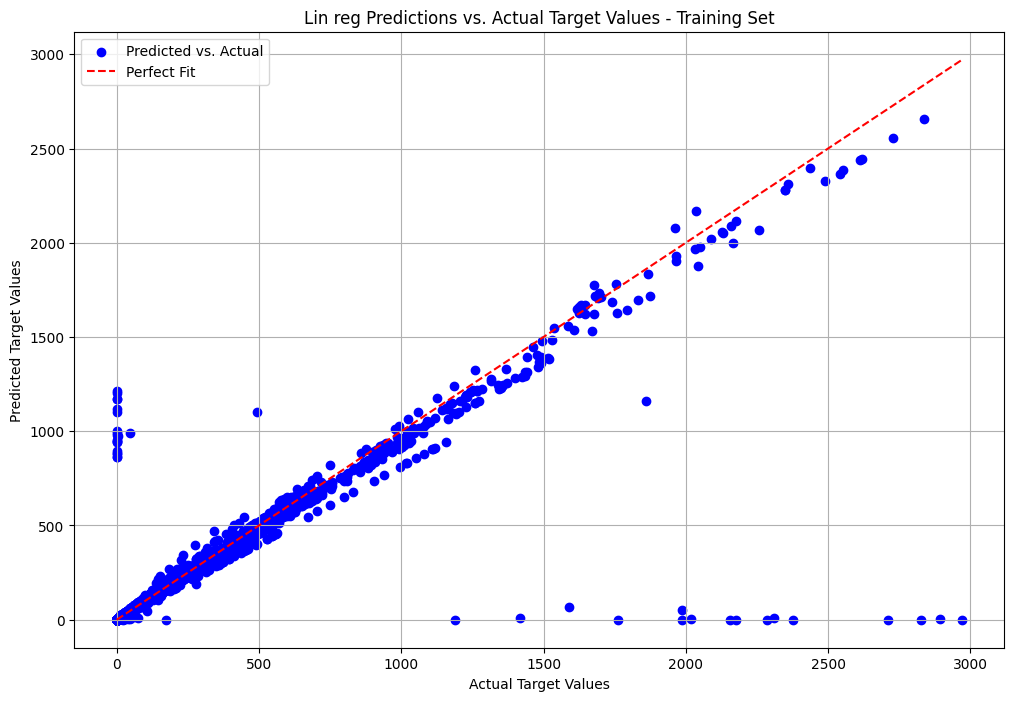

In [56]:
plt.figure(figsize=(12, 8))
plt.scatter(y_train, Y_pred, c='b', label='Predicted vs. Actual')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'r--', label='Perfect Fit')
plt.xlabel("Actual Target Values")
plt.ylabel("Predicted Target Values")
plt.title("Lin reg Predictions vs. Actual Target Values - Training Set")
plt.legend()
plt.grid(True)
plt.show()

In [57]:
Wt, Y_predt, mset = lin_model(X_test, y_test)

In [58]:
print(Wt)

[1371.99859509  920.70086085  914.30476618  306.89031398  164.88414281]


In [59]:
print(Y_predt)

[2.85226933e-01 2.40844058e+00 2.59322805e-01 ... 2.08646015e+00
 5.32423609e-02 4.34898362e+02]


In [60]:
print(mset)

2284.2769690321716


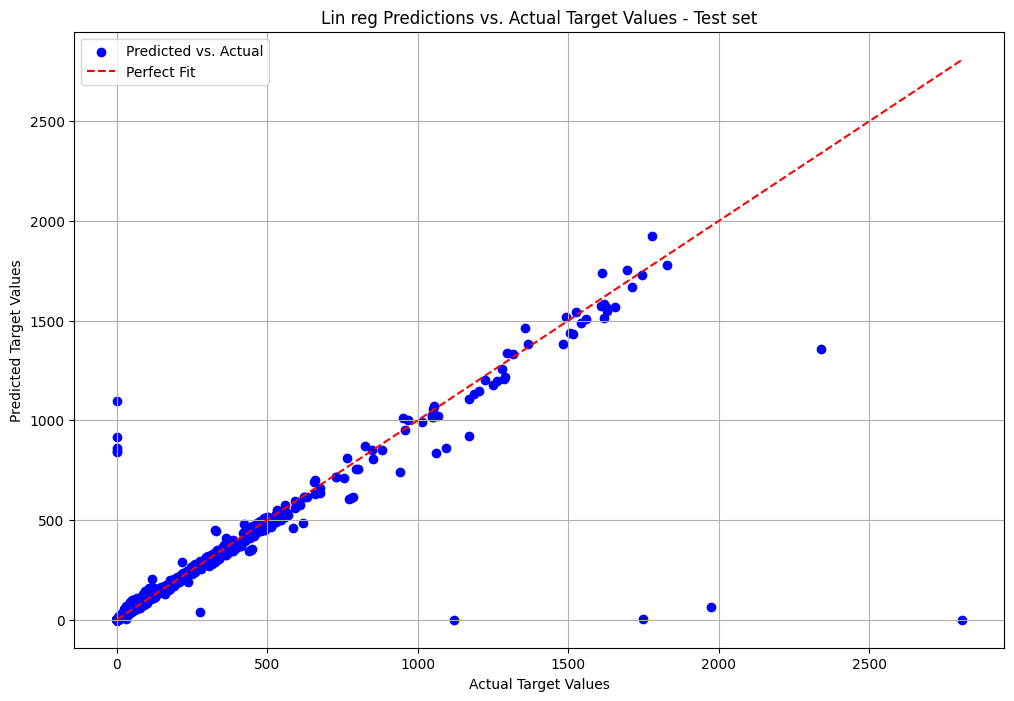

In [61]:
plt.figure(figsize=(12, 8))
plt.scatter(y_test, Y_predt, c='b', label='Predicted vs. Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='Perfect Fit')
plt.xlabel("Actual Target Values")
plt.ylabel("Predicted Target Values")
plt.title("Lin reg Predictions vs. Actual Target Values - Test set")
plt.legend()
plt.grid(True)
plt.show()

In [62]:
def ridgeReg(X, Y):
    lam= 0.5
    Xt = np.transpose(X)
    XtX = np.dot(Xt,X)
    I = np.identity(XtX.shape[0])
    lamI = lam*I
    XtX_reg = XtX + lamI
    XtX_inv = np.linalg.inv(XtX_reg)
    XtY = np.dot(Xt, Y)
    W = np.dot(XtX_inv, XtY)
    y_pred = np.dot(X,W)
    mse = (1/(2*(Y.size)))*np.sum(np.square(y_pred-Y))
    
    return W, y_pred, mse

In [63]:
W2, y_pred2, mse2 = ridgeReg(X_train, y_train)
print(W2)

[1238.34312447  972.98132085 1073.88746117  435.60889936  109.57057972]


In [64]:
print(y_pred2)

[ 96.4084898  114.89404776   3.75886751 ...   0.59433571  57.48157767
   4.08620485]


In [65]:
print(y_train)

42135     93.788159
22014    109.485277
45640     29.982233
61434     17.495162
13546      9.468807
            ...    
26304      7.015757
28782      0.025648
18991      0.729136
44252     59.936086
5249       4.462752
Name: Total, Length: 19068, dtype: float64


In [66]:
print(mse2)

2688.189365632622


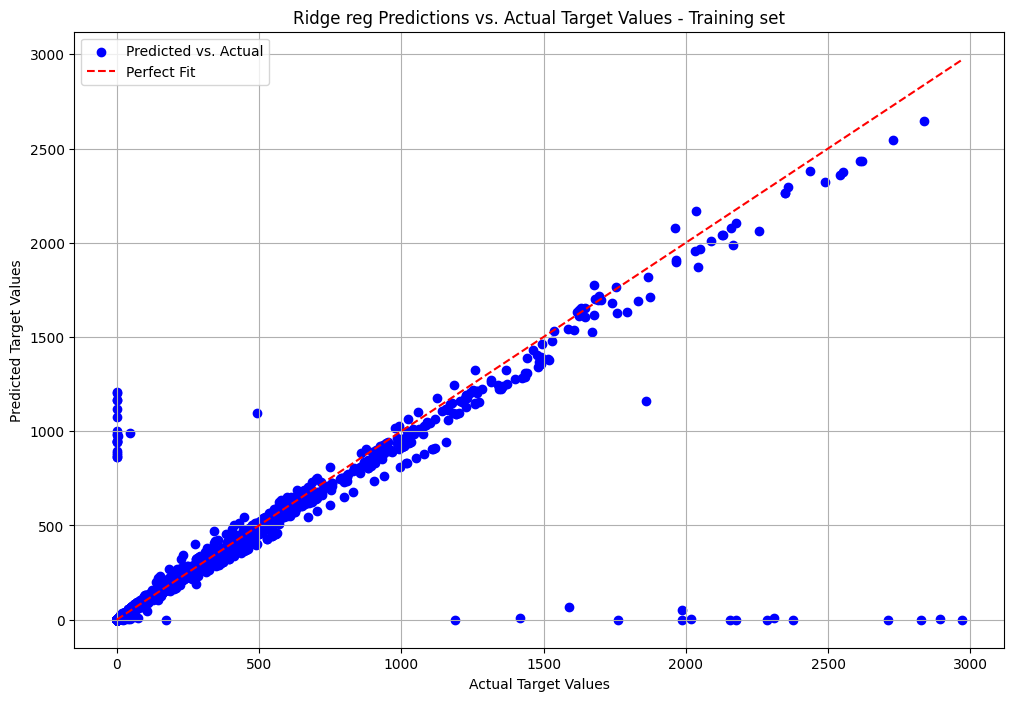

In [67]:
plt.figure(figsize=(12, 8))
plt.scatter(y_train, y_pred2, c='b', label='Predicted vs. Actual')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'r--', label='Perfect Fit')
plt.xlabel("Actual Target Values")
plt.ylabel("Predicted Target Values")
plt.title("Ridge reg Predictions vs. Actual Target Values - Training set")
plt.legend()
plt.grid(True)
plt.show()

In [68]:
W2t, y_pred2t, mse2t = ridgeReg(X_test, y_test)
print(W2t)

[1343.19186537  905.70753288  856.61257244  347.36662894  186.73045928]


In [69]:
print(y_pred2t)

[2.79238257e-01 2.36517939e+00 2.55099814e-01 ... 2.05023963e+00
 5.21244747e-02 4.25778479e+02]


In [70]:
print(y_test)

24853      0.274800
55742      2.560492
22573      0.329760
50759      0.000000
48095      0.000000
            ...    
21385    387.427696
46540      0.000000
22836      2.506460
43696      0.051296
59446    419.740512
Name: Total, Length: 4767, dtype: float64


In [71]:
print(mse2t)

2288.6588077049464


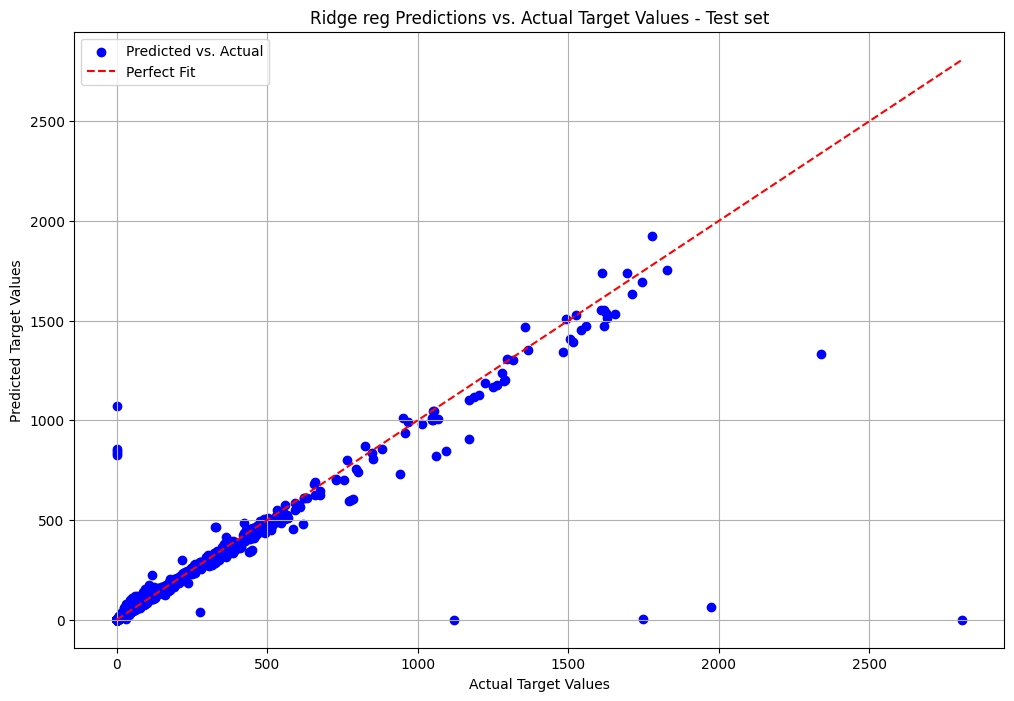

In [72]:
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_pred2t, c='b', label='Predicted vs. Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='Perfect Fit')
plt.xlabel("Actual Target Values")
plt.ylabel("Predicted Target Values")
plt.title("Ridge reg Predictions vs. Actual Target Values - Test set")
plt.legend()
plt.grid(True)
plt.show()

In [73]:
def ridgeReg(X, Y):
    lam= 0.5
    Xt = np.transpose(X)
    XtX = np.dot(Xt,X)
    I = np.identity(XtX.shape[0])
    lamI = lam*I
    XtX_reg = XtX + lamI
    XtX_inv = np.linalg.inv(XtX_reg)
    XtY = np.dot(Xt, Y)
    W = np.dot(XtX_inv, XtY)
    y_pred = np.dot(X,W)
    mse = (1/(2*(Y.size)))*np.sum(np.square(y_pred-Y))
    
    return W, y_pred, mse

In [74]:
def ridgeRegGradient(X, Y, lam, num_iterations=500, alpha=0.01):
    n = X.shape[1]
    W = np.random.randn(n, 1)

    for _ in range(num_iterations):    
        #W_T = np.transpose(W)
        preds = np.matmul(X, W)
        W = W - alpha*(lam*W - np.matmul(np.transpose(X), (Y-preds)))
    return W    

In [75]:
type(X_train.to_numpy())
X_train, Y_train = X_train.to_numpy(), y_train.to_numpy()
Y_train = Y_train.reshape(-1, 1)
Y_train.shape

(19068, 1)

In [76]:
ridgeRegGradient(X_train, Y_train, lam=0.1, num_iterations= 3000, alpha=0.001)

array([[1241.07417984],
       [ 973.54865139],
       [1096.21243936],
       [ 428.69120531],
       [ 103.12132348]])